# Dataset Face Extraction


This notebook is used to extract faces from [Celeb-DF-v2](https://github.com/yuezunli/celeb-deepfakeforensics), [DeeperForensics-1.0](https://github.com/EndlessSora/DeeperForensics-1.0), and [DFDC](https://www.kaggle.com/c/deepfake-detection-challenge) dataset for deepfake detection research purposes. The [600 sampled videos](https://github.com/ramaastra/deepfake-detection-cnn-mc-dropout/tree/main/data-sampling) from the three datasets are extracted to be 100 frames for each video, resulting in a total of 60,000 frames of image.


In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import random

%matplotlib inline

## Define Dataset Directory Path


In [2]:
CDF_DIR = "/mnt/e/samples/videos/Celeb-DF-v2"
CDF_DEEPFAKE_DIR = os.path.join(CDF_DIR, "Deepfake")
CDF_ORIGINAL_VID_DIR = os.path.join(CDF_DIR, "Original")

DF_DIR = "/mnt/e/samples/videos/DeeperForensics-1.0"
DF_DEEPFAKE_DIR = os.path.join(DF_DIR, "Deepfake")
DF_ORIGINAL_VID_DIR = os.path.join(DF_DIR, "Original")

DFDC_DIR = "/mnt/e/samples/videos/DFDC"
DFDC_DEEPFAKE_DIR = os.path.join(DFDC_DIR, "Deepfake")
DFDC_ORIGINAL_VID_DIR = os.path.join(DFDC_DIR, "Original")

In [3]:
CDF_OUTPUT_DIR = "/mnt/e/samples/extracted/Celeb-DF-v2"
CDF_DEEPFAKE_OUTPUT_DIR = os.path.join(CDF_OUTPUT_DIR, "Deepfake")
CDF_ORIGINAL_VID_OUTPUT_DIR = os.path.join(CDF_OUTPUT_DIR, "Original")

DF_OUTPUT_DIR = "/mnt/e/samples/extracted/DeeperForensics-1.0"
DF_DEEPFAKE_OUTPUT_DIR = os.path.join(DF_OUTPUT_DIR, "Deepfake")
DF_ORIGINAL_VID_OUTPUT_DIR = os.path.join(DF_OUTPUT_DIR, "Original")

DFDC_OUTPUT_DIR = "/mnt/e/samples/extracted/DFDC"
DFDC_DEEPFAKE_OUTPUT_DIR = os.path.join(DFDC_OUTPUT_DIR, "Deepfake")
DFDC_ORIGINAL_VID_OUTPUT_DIR = os.path.join(DFDC_OUTPUT_DIR, "Original")

## Face Cropping Function


In [4]:
def crop_face(frame):
    face_cascade = cv2.CascadeClassifier(
        cv2.data.haarcascades + "haarcascade_frontalface_alt2.xml"
    )

    grayscale_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    detected_faces = face_cascade.detectMultiScale(
        grayscale_frame, scaleFactor=1.1, minNeighbors=6, minSize=(50, 50)
    )

    for x, y, w, h in detected_faces:
        cropped_face = frame[y : y + h, x : x + w]
        return cropped_face

    cv2.destroyAllWindows()

## Frame Extraction Function


In [5]:
def extract_frames(video_path, output_dir, num_output_frames=100):
    extracted_frames = []

    video_filename = video_path.split("/")[-1]
    filename, _ = os.path.splitext(video_path)
    filename = filename.split("/")[-1]

    print(f"Extracting {video_filename}")

    # Extract face frames from the video file
    cap = cv2.VideoCapture(video_path)
    while cap.isOpened():
        ret, frame = cap.read()

        if not ret:
            break

        cropped_face = crop_face(frame)
        if cropped_face is None:
            continue

        extracted_frames.append(cropped_face)

    cap.release()

    # Write num_output_frames extracted frames to output_dir
    saved_frames_count = 0
    frame_interval = (
        len(extracted_frames) // num_output_frames
        if len(extracted_frames) > num_output_frames
        else 1
    )
    for i in range(0, len(extracted_frames), frame_interval):
        saved_frames_count += 1
        cv2.imwrite(
            os.path.join(output_dir, f"{filename}-{i}.jpg"),
            extracted_frames[i],
        )

        if saved_frames_count >= num_output_frames:
            break

    print("=> Face frames successfully extracted and saved.\n")

## Videos Frame Extraction by Directory Function


In [6]:
def extract_videos(videos_dir, output_dir):
    for filename in os.listdir(videos_dir):
        filepath = os.path.join(videos_dir, filename)
        extract_frames(filepath, output_dir)

## Function to Preview Extracted Frames


In [7]:
def preview_frames(frames_dir, num_preview_frames=20, title="Frame Preview"):
    frame_filepaths = [
        os.path.join(frames_dir, filename) for filename in os.listdir(frames_dir)
    ]
    sample_frame_filepaths = random.sample(frame_filepaths, num_preview_frames)

    num_cols = 5
    num_rows = num_preview_frames // 5
    fig, axs = plt.subplots(
        num_rows, num_cols, figsize=(12, 8), constrained_layout=True
    )
    fig.suptitle(title, fontsize=16)

    for i, ax in enumerate(axs.flatten()):
        img = plt.imread(sample_frame_filepaths[i])
        ax.imshow(img)
        ax.axis("off")

    plt.show()

## Extract Celeb-DF-v2 Dataset


In [8]:
extract_videos(CDF_DEEPFAKE_DIR, CDF_DEEPFAKE_OUTPUT_DIR)

Extracting id0_id16_0001.mp4
=> Face frames successfully extracted and saved.

Extracting id0_id1_0000.mp4
=> Face frames successfully extracted and saved.

Extracting id0_id6_0009.mp4
=> Face frames successfully extracted and saved.

Extracting id10_id12_0006.mp4
=> Face frames successfully extracted and saved.

Extracting id11_id7_0003.mp4
=> Face frames successfully extracted and saved.

Extracting id11_id7_0006.mp4
=> Face frames successfully extracted and saved.

Extracting id12_id7_0000.mp4
=> Face frames successfully extracted and saved.

Extracting id13_id10_0014.mp4
=> Face frames successfully extracted and saved.

Extracting id13_id7_0007.mp4
=> Face frames successfully extracted and saved.

Extracting id13_id7_0008.mp4
=> Face frames successfully extracted and saved.

Extracting id16_id1_0007.mp4
=> Face frames successfully extracted and saved.

Extracting id16_id9_0004.mp4
=> Face frames successfully extracted and saved.

Extracting id17_id26_0009.mp4
=> Face frames success

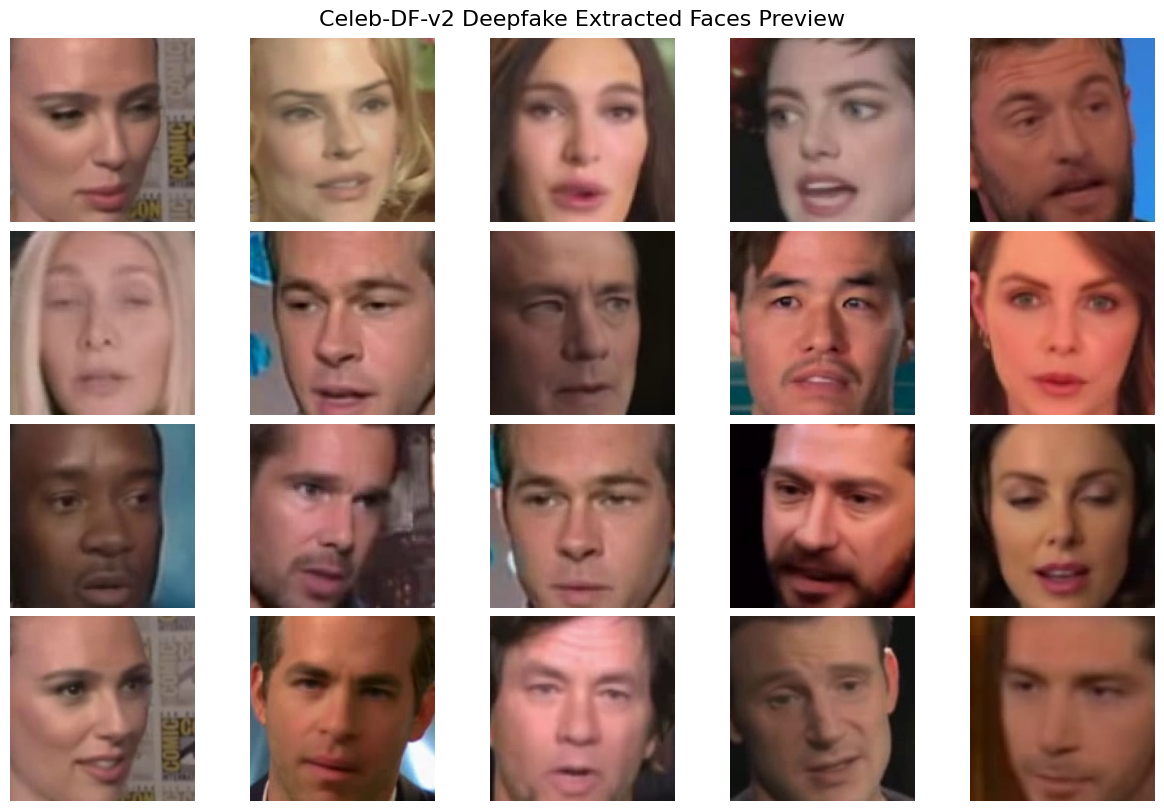

In [9]:
preview_frames(
    CDF_DEEPFAKE_OUTPUT_DIR, title="Celeb-DF-v2 Deepfake Extracted Faces Preview"
)

In [10]:
extract_videos(CDF_ORIGINAL_VID_DIR, CDF_ORIGINAL_VID_OUTPUT_DIR)

Extracting id0_0000.mp4
=> Face frames successfully extracted and saved.

Extracting id0_0001.mp4
=> Face frames successfully extracted and saved.

Extracting id0_0009.mp4
=> Face frames successfully extracted and saved.

Extracting id10_0006.mp4
=> Face frames successfully extracted and saved.

Extracting id11_0003.mp4
=> Face frames successfully extracted and saved.

Extracting id11_0006.mp4
=> Face frames successfully extracted and saved.

Extracting id12_0000.mp4
=> Face frames successfully extracted and saved.

Extracting id13_0007.mp4
=> Face frames successfully extracted and saved.

Extracting id13_0008.mp4
=> Face frames successfully extracted and saved.

Extracting id13_0014.mp4
=> Face frames successfully extracted and saved.

Extracting id16_0004.mp4
=> Face frames successfully extracted and saved.

Extracting id16_0007.mp4
=> Face frames successfully extracted and saved.

Extracting id17_0006.mp4
=> Face frames successfully extracted and saved.

Extracting id17_0009.mp4
=> 

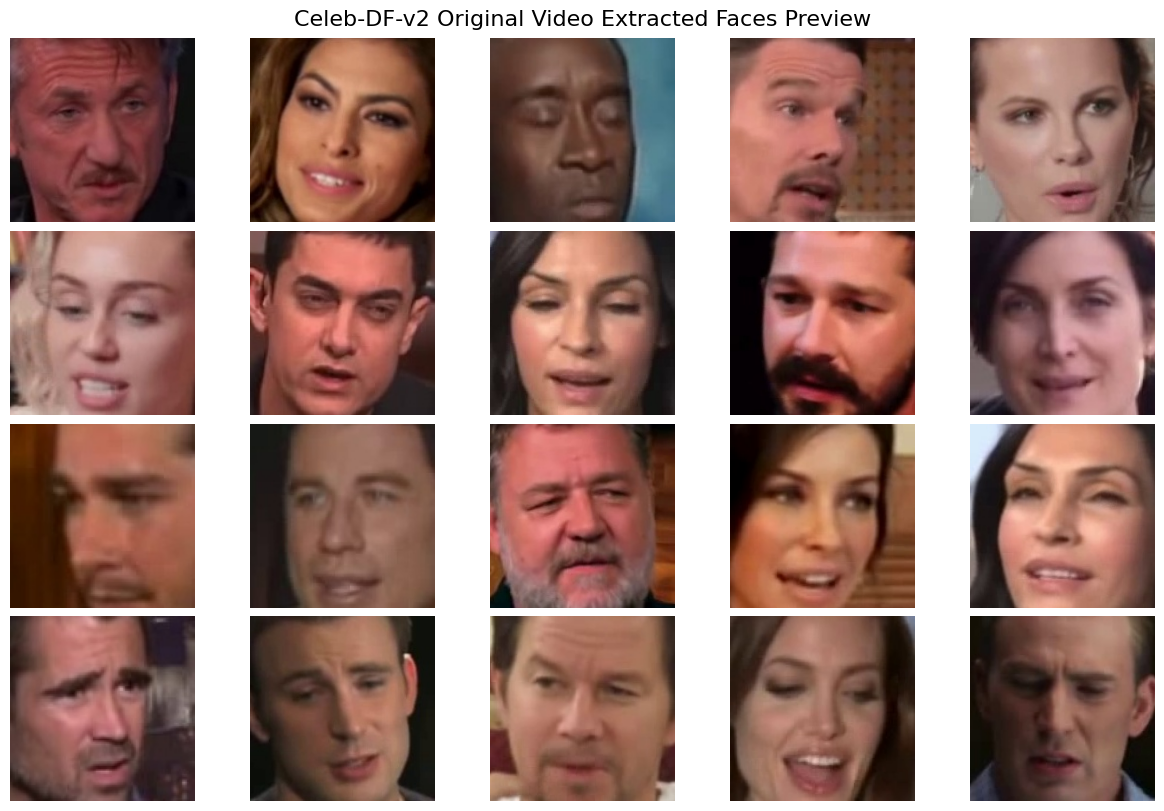

In [11]:
preview_frames(
    CDF_ORIGINAL_VID_OUTPUT_DIR,
    title="Celeb-DF-v2 Original Video Extracted Faces Preview",
)

## Extract DeeperForensics-1.0 Dataset


In [12]:
extract_videos(DF_DEEPFAKE_DIR, DF_DEEPFAKE_OUTPUT_DIR)

Extracting 008_W101.mp4
=> Face frames successfully extracted and saved.

Extracting 017_W006.mp4
=> Face frames successfully extracted and saved.

Extracting 019_W007.mp4
=> Face frames successfully extracted and saved.

Extracting 024_M113.mp4
=> Face frames successfully extracted and saved.

Extracting 039_M114.mp4
=> Face frames successfully extracted and saved.

Extracting 054_M117.mp4
=> Face frames successfully extracted and saved.

Extracting 057_W012.mp4
=> Face frames successfully extracted and saved.

Extracting 065_W005.mp4
=> Face frames successfully extracted and saved.

Extracting 083_W015.mp4
=> Face frames successfully extracted and saved.

Extracting 120_W021.mp4
=> Face frames successfully extracted and saved.

Extracting 121_W021.mp4
=> Face frames successfully extracted and saved.

Extracting 132_W023.mp4
=> Face frames successfully extracted and saved.

Extracting 142_W025.mp4
=> Face frames successfully extracted and saved.

Extracting 163_M005.mp4
=> Face frames

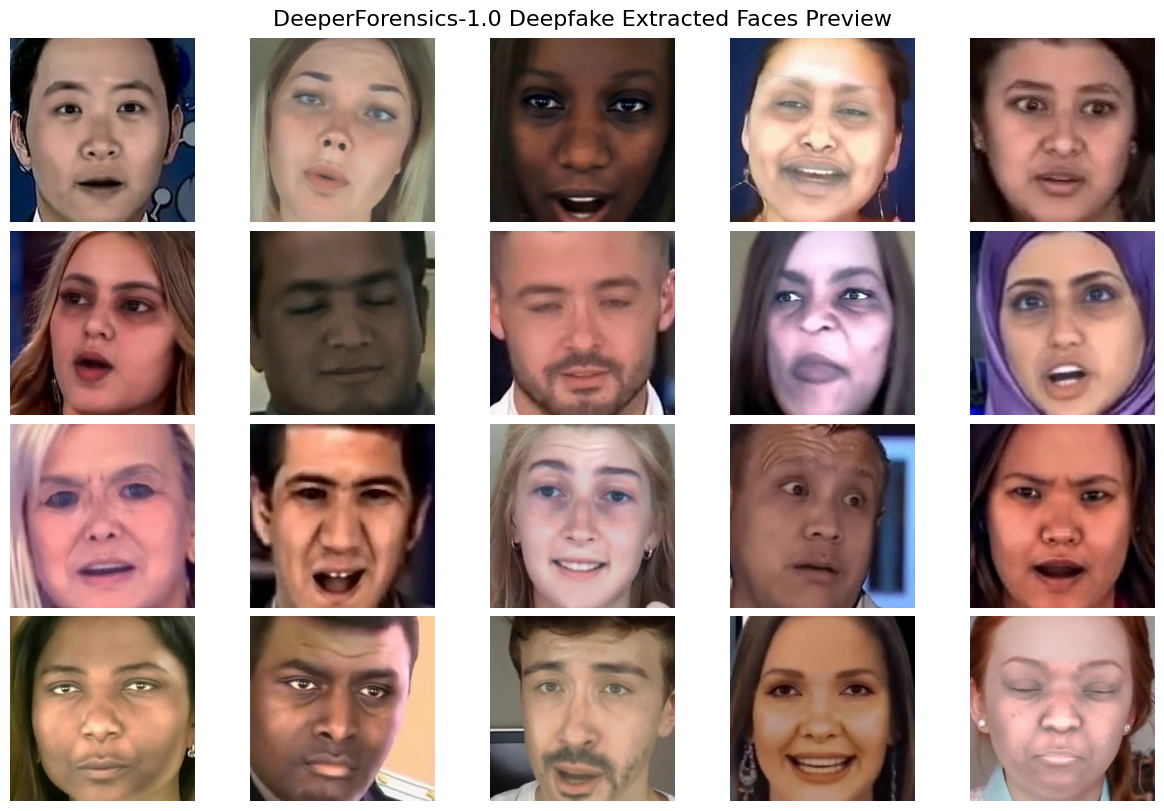

In [14]:
preview_frames(
    DF_DEEPFAKE_OUTPUT_DIR, title="DeeperForensics-1.0 Deepfake Extracted Faces Preview"
)

In [15]:
extract_videos(DF_ORIGINAL_VID_DIR, DF_ORIGINAL_VID_OUTPUT_DIR)

Extracting 008.mp4
=> Face frames successfully extracted and saved.

Extracting 017.mp4
=> Face frames successfully extracted and saved.

Extracting 019.mp4
=> Face frames successfully extracted and saved.

Extracting 024.mp4
=> Face frames successfully extracted and saved.

Extracting 039.mp4
=> Face frames successfully extracted and saved.

Extracting 054.mp4
=> Face frames successfully extracted and saved.

Extracting 057.mp4
=> Face frames successfully extracted and saved.

Extracting 065.mp4
=> Face frames successfully extracted and saved.

Extracting 083.mp4
=> Face frames successfully extracted and saved.

Extracting 120.mp4
=> Face frames successfully extracted and saved.

Extracting 121.mp4
=> Face frames successfully extracted and saved.

Extracting 132.mp4
=> Face frames successfully extracted and saved.

Extracting 142.mp4
=> Face frames successfully extracted and saved.

Extracting 163.mp4
=> Face frames successfully extracted and saved.

Extracting 174.mp4
=> Face frames 

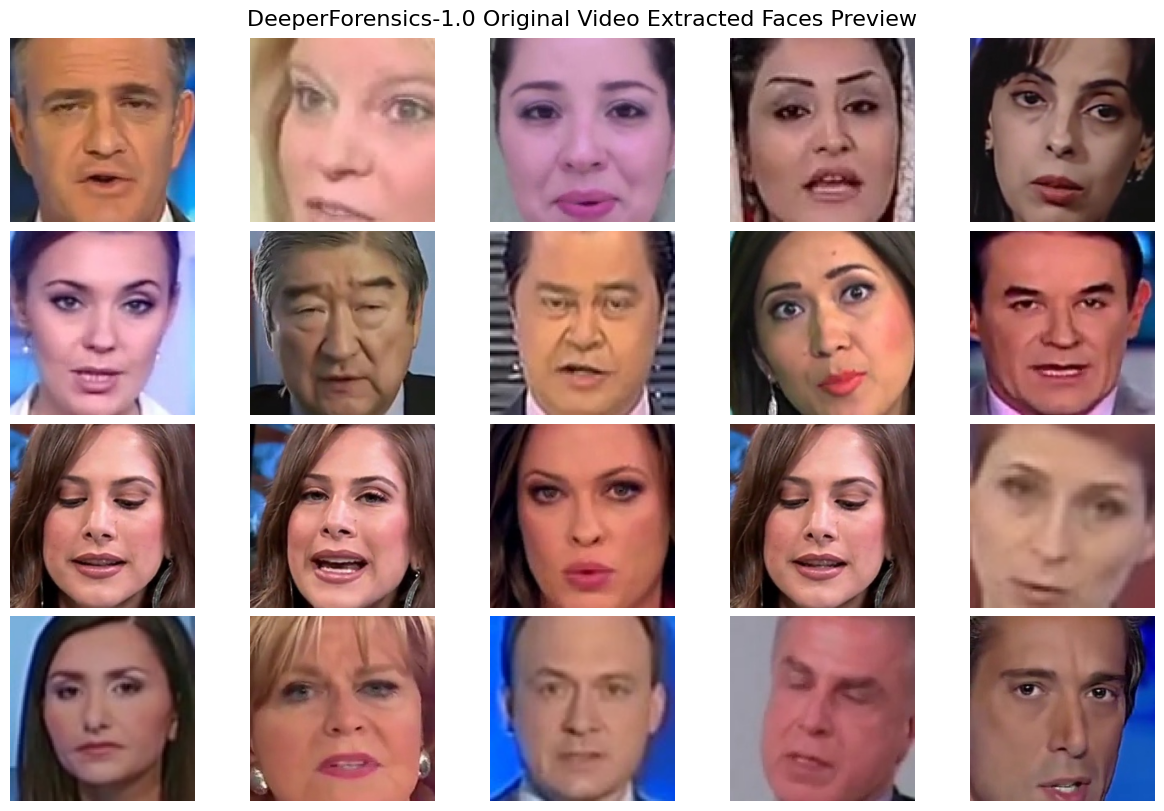

In [16]:
preview_frames(
    DF_ORIGINAL_VID_OUTPUT_DIR,
    title="DeeperForensics-1.0 Original Video Extracted Faces Preview",
)

## Extract DFDC Dataset


In [17]:
extract_videos(DFDC_DEEPFAKE_DIR, DFDC_DEEPFAKE_OUTPUT_DIR)

Extracting acrpacryoy.mp4
=> Face frames successfully extracted and saved.

Extracting aeicdssqro.mp4
=> Face frames successfully extracted and saved.

Extracting akhzndtglc.mp4
=> Face frames successfully extracted and saved.

Extracting alvqhgaeeu.mp4
=> Face frames successfully extracted and saved.

Extracting aofqqeiisz.mp4
=> Face frames successfully extracted and saved.

Extracting aumyahypue.mp4
=> Face frames successfully extracted and saved.

Extracting baoyaflncn.mp4
=> Face frames successfully extracted and saved.

Extracting bjqjyplccn.mp4
=> Face frames successfully extracted and saved.

Extracting bwpuxeqbso.mp4
=> Face frames successfully extracted and saved.

Extracting bzwtxeifuu.mp4
=> Face frames successfully extracted and saved.

Extracting cbnyssjaho.mp4
=> Face frames successfully extracted and saved.

Extracting cdwoinhglz.mp4
=> Face frames successfully extracted and saved.

Extracting clfkbhcgpj.mp4
=> Face frames successfully extracted and saved.

Extracting c

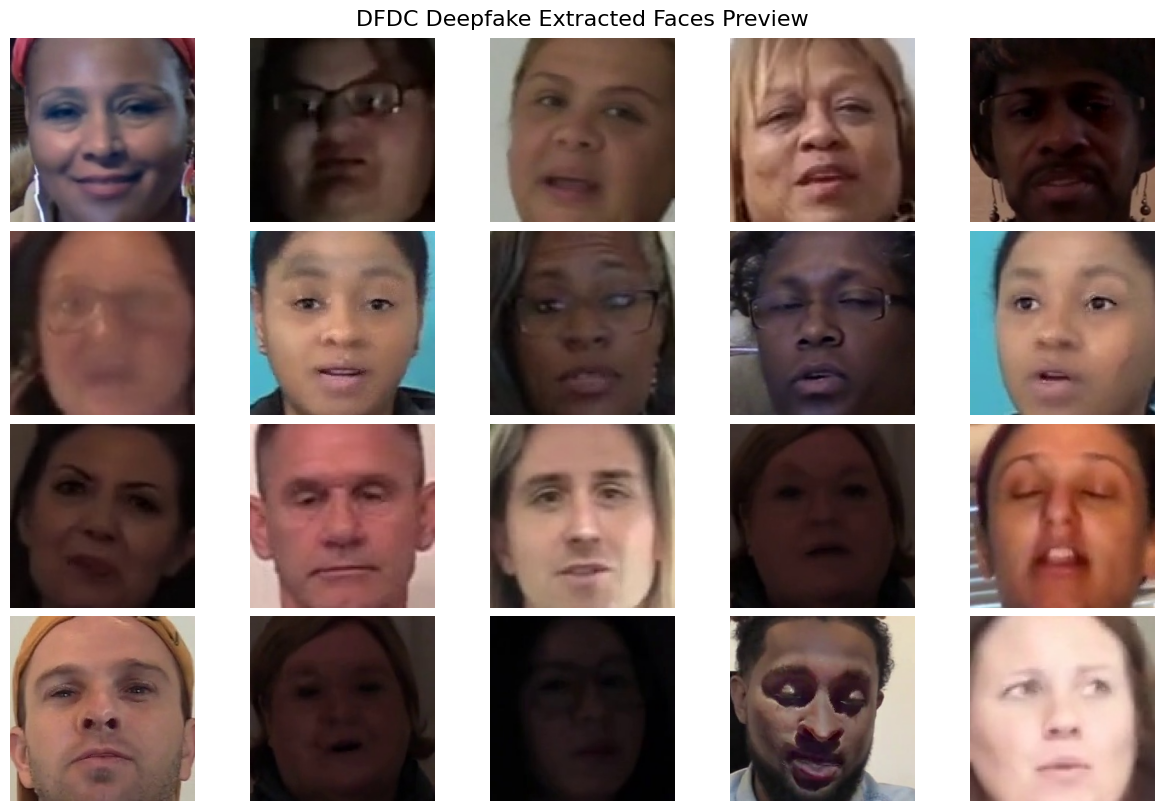

In [18]:
preview_frames(DFDC_DEEPFAKE_OUTPUT_DIR, title="DFDC Deepfake Extracted Faces Preview")

In [19]:
extract_videos(DFDC_ORIGINAL_VID_DIR, DFDC_ORIGINAL_VID_OUTPUT_DIR)

Extracting aatlprhwxl.mp4
=> Face frames successfully extracted and saved.

Extracting aelfnikyqj.mp4
=> Face frames successfully extracted and saved.

Extracting ahesnzswur.mp4
=> Face frames successfully extracted and saved.

Extracting aieqhlrbev.mp4
=> Face frames successfully extracted and saved.

Extracting annmtetkqa.mp4
=> Face frames successfully extracted and saved.

Extracting avkeqerpsc.mp4
=> Face frames successfully extracted and saved.

Extracting bdnesbbphy.mp4
=> Face frames successfully extracted and saved.

Extracting bduhuslewa.mp4
=> Face frames successfully extracted and saved.

Extracting bhifvlgump.mp4
=> Face frames successfully extracted and saved.

Extracting biksijpktj.mp4
=> Face frames successfully extracted and saved.

Extracting bkidieecdg.mp4
=> Face frames successfully extracted and saved.

Extracting cgqolgmapv.mp4
=> Face frames successfully extracted and saved.

Extracting cojtqauazp.mp4
=> Face frames successfully extracted and saved.

Extracting c

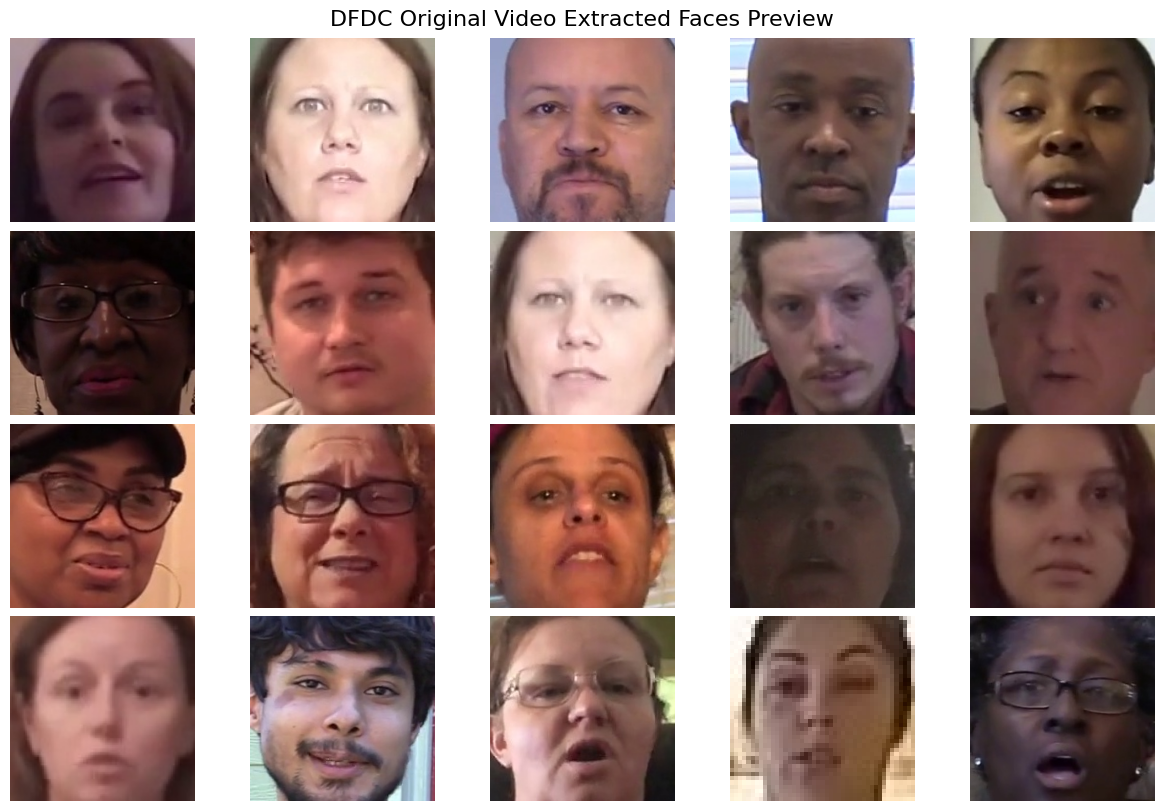

In [20]:
preview_frames(
    DFDC_ORIGINAL_VID_OUTPUT_DIR, title="DFDC Original Video Extracted Faces Preview"
)